Importado librerías:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

%matplotlib inline

#from google.colab import files
#files.upload()

Cargando los datos:

In [ ]:
data = pd.read_csv('./Saber_11__2019-2.csv')
ori_data = pd.read_csv('./Saber_11__2019-2.csv')

print('Número de instancias = %d' % (data.shape[0]))   #546612
print('Número de atributos = %d' % (data.shape[1]))  #82

data = data.replace('-', np.NaN)
data = data.astype({'ESTU_INSE_INDIVIDUAL': float, 'ESTU_NSE_INDIVIDUAL': float, 'ESTU_NSE_ESTABLECIMIENTO': float})

data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (76,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Número de instancias = 546212
Número de atributos = 82


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,...,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,2/18/2002 0:00,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,NaN,MAGDALENA,47,SANTA ANA,47707,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",39008,1.480000e+11,...,OFICIAL,A,N,TÉCNICO/ACADÉMICO,1.480000e+11,COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,47707,SANTA ANA,47,MAGDALENA,N,47707,SANTA ANA,MAGDALENA,47,47,33,2,48,42,2,37,15,1,30,8,1,54.0,67,A1,208,25,50.942156,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,6/28/2003 0:00,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,NaN,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",128611,3.110000e+11,...,NO OFICIAL,A,NaN,ACADÉMICO,3.110000e+11,GIMN SAN ANGELO,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,A2,299,83,59.767864,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,6/2/2001 0:00,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,NaN,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",35493,1.130000e+11,...,OFICIAL,A,N,TÉCNICO/ACADÉMICO,1.130000e+11,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,13001,CARTAGENA DE INDIAS,13,BOLIVAR,N,13001,CARTAGENA DE INDIAS,BOLIVAR,13,66,91,4,57,70,3,41,29,2,74,99,4,64.0,89,A2,299,84,50.764238,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,4/26/2002 0:00,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 3,3 a 4

Outliers:

Detección de outliers con diagramas de caja, dividiendo la distribución en dos partes iguales 50% de los datos (mediana).

Los valores por debajo del límite inferior y por encima del límite superior se consideran atípicos.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)




PUNT_LECTURA_CRITICA : 
		Q1: 45.0 Q3: 60.0 Linf: 22.5 Lsup: 82.5
PUNT_MATEMATICAS : 
		Q1: 42.0 Q3: 59.0 Linf: 16.5 Lsup: 84.5
PUNT_C_NATURALES : 
		Q1: 40.0 Q3: 56.0 Linf: 16.0 Lsup: 80.0
PUNT_INGLES : 
		Q1: 39.0 Q3: 56.0 Linf: 13.5 Lsup: 81.5
PUNT_SOCIALES_CIUDADANAS : 
		Q1: 37.0 Q3: 55.0 Linf: 10.0 Lsup: 82.0




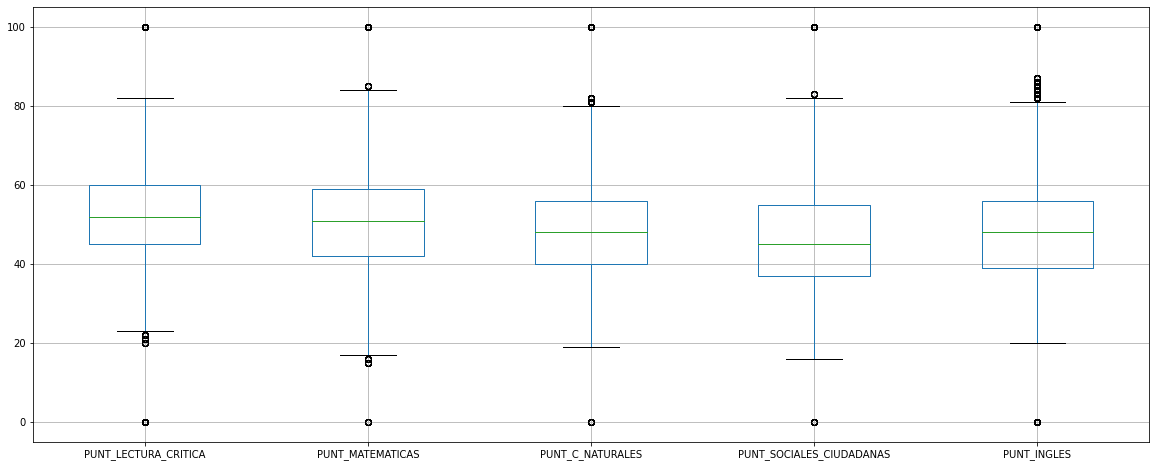



PUNT_GLOBAL : 
		Q1: 207.0 Q3: 282.0 Linf: 94.5 Lsup: 394.5




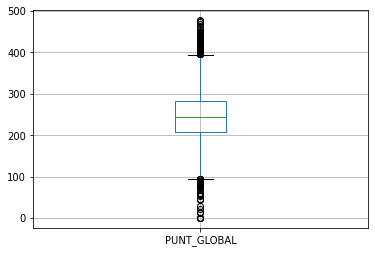



ESTU_INSE_INDIVIDUAL : 
		Q1: 43.32503136 Q3: 56.488432610000004 Linf: 23.579929484999987 Lsup: 76.233534485




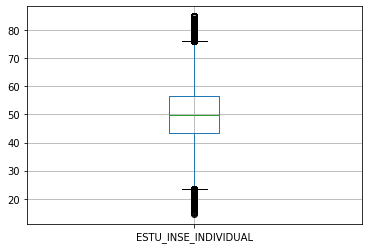

In [ ]:
def printOuliers(label):
  for i in np.arange(0, 1.25, 0.25):
      if(i == 0.25):
          q1 = data[label].quantile(i)
      if(i == 0.75):
          q3 = data[label].quantile(i)

  li = q1-(1.5*(q3-q1))
  ls = q3+(1.5*(q3-q1))
  print(label, ":", "\n\t\tQ1:", q1, "Q3:", q3, "Linf:", li, "Lsup:", ls)


plt.figure(figsize = (20, 8)) 
data.boxplot(column = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES'])
print("\n"); printOuliers('PUNT_LECTURA_CRITICA')
printOuliers('PUNT_MATEMATICAS')
printOuliers('PUNT_C_NATURALES')
printOuliers('PUNT_INGLES')
printOuliers('PUNT_SOCIALES_CIUDADANAS'); print("\n")
plt.show()
data.boxplot(column = ['PUNT_GLOBAL'])
print("\n"); printOuliers('PUNT_GLOBAL'); print("\n")
plt.show()
data.boxplot(column = ['ESTU_INSE_INDIVIDUAL'])
print("\n"); printOuliers('ESTU_INSE_INDIVIDUAL'); print("\n")
plt.show()

Para descartar los valores atípicos, podemos calcular la puntuación estándar (Z-score):

$z={x-\mu  \over \sigma }$

Descartando valores con $3<Z<-3 $

In [ ]:
def z_score(label):
    global data
    Z = (data[label]-data[label].mean())/data[label].std()
    #print(Z[20:25])
    print(label, ":")
    print('\tNúmero de filas antes de descartar outliers = %d' % (Z.shape[0]))
    Z2 = Z.shape[0]
    discardColumns = []
    for i in range(len(Z)):
        if(Z[i]<=-3 or Z[i]>=3):
            discardColumns.append(i)
            Z2 -= 1
    data = data.drop(discardColumns).reset_index(drop=True)
    print('\tNúmero de filas después de descartar outliers = %d' % (Z2))
    print('\tOutliers = %d' % (Z.shape[0] - Z2))
    print("\n")

z_score('PUNT_LECTURA_CRITICA')
z_score('PUNT_MATEMATICAS')
z_score('PUNT_C_NATURALES')
z_score('PUNT_SOCIALES_CIUDADANAS')
z_score('PUNT_INGLES')
z_score('PUNT_GLOBAL')
z_score('ESTU_INSE_INDIVIDUAL')
print("\nNúmero de filas luego de la eliminación de las filas con outliers: %d" % (data.shape[0]))

PUNT_LECTURA_CRITICA :
	Número de filas antes de descartar outliers = 546212
	Número de filas después de descartar outliers = 545857
	Outliers = 355


PUNT_MATEMATICAS :
	Número de filas antes de descartar outliers = 545857
	Número de filas después de descartar outliers = 545339
	Outliers = 518


PUNT_C_NATURALES :
	Número de filas antes de descartar outliers = 545339
	Número de filas después de descartar outliers = 545118
	Outliers = 221


PUNT_SOCIALES_CIUDADANAS :
	Número de filas antes de descartar outliers = 545118
	Número de filas después de descartar outliers = 544926
	Outliers = 192


PUNT_INGLES :
	Número de filas antes de descartar outliers = 544926
	Número de filas después de descartar outliers = 543437
	Outliers = 1489


PUNT_GLOBAL :
	Número de filas antes de descartar outliers = 543437
	Número de filas después de descartar outliers = 543425
	Outliers = 12


ESTU_INSE_INDIVIDUAL :
	Número de filas antes de descartar outliers = 543425
	Número de filas después de descartar o

Datos perdidos:


*   La columna ESTU_ETNIA es removida debido al alto porcentaje de datos perdidos 92.7%.



In [ ]:
print('Número de valores perdidos:')
l = len(data["ESTU_NSE_ESTABLECIMIENTO"])
aux = []
for col in data.columns:
    n = data[col].isna().sum()
    porc = n/l*100
    print('\t%s: %d (%.1f%%)' % (col,n,porc))
    if porc > 20:
        aux.append(col)
        data = data.drop(col, axis=1)

print("\nColumnas eliminadas:", aux)
print("Nuevo número de atributos:", data.shape[1])

Número de valores perdidos:
	ESTU_TIPODOCUMENTO: 0 (0.0%)
	ESTU_NACIONALIDAD: 0 (0.0%)
	ESTU_GENERO: 120 (0.0%)
	ESTU_FECHANACIMIENTO: 0 (0.0%)
	PERIODO: 0 (0.0%)
	ESTU_CONSECUTIVO: 0 (0.0%)
	ESTU_ESTUDIANTE: 0 (0.0%)
	ESTU_TIENEETNIA: 371 (0.1%)
	ESTU_PAIS_RESIDE: 0 (0.0%)
	ESTU_ETNIA: 502037 (92.6%)
	ESTU_DEPTO_RESIDE: 371 (0.1%)
	ESTU_COD_RESIDE_DEPTO: 371 (0.1%)
	ESTU_MCPIO_RESIDE: 371 (0.1%)
	ESTU_COD_RESIDE_MCPIO: 371 (0.1%)
	FAMI_ESTRATOVIVIENDA: 34255 (6.3%)
	FAMI_PERSONASHOGAR: 15829 (2.9%)
	FAMI_CUARTOSHOGAR: 16991 (3.1%)
	FAMI_EDUCACIONPADRE: 30298 (5.6%)
	FAMI_EDUCACIONMADRE: 30138 (5.6%)
	FAMI_TRABAJOLABORPADRE: 18129 (3.3%)
	FAMI_TRABAJOLABORMADRE: 17334 (3.2%)
	FAMI_TIENEINTERNET: 30736 (5.7%)
	FAMI_TIENESERVICIOTV: 31689 (5.8%)
	FAMI_TIENECOMPUTADOR: 16795 (3.1%)
	FAMI_TIENELAVADORA: 16583 (3.1%)
	FAMI_TIENEHORNOMICROOGAS: 17369 (3.2%)
	FAMI_TIENEAUTOMOVIL: 17902 (3.3%)
	FAMI_TIENEMOTOCICLETA: 16926 (3.1%)
	FAMI_TIENECONSOLAVIDEOJUEGOS: 17908 (3.3%)
	FAMI_NUMLIBROS: 443

Datos duplicados:

In [ ]:
dups = data.duplicated()
print('Número de filas duplicadas = %d' % (dups.sum()))

Número de filas duplicadas = 0


Reemplazando valores perdidos:
* Usando la mediana:

In [ ]:
#Replacing using median
rowNames = [
    "PUNT_INGLES", "PERCENTIL_GLOBAL", "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL", "ESTU_NSE_ESTABLECIMIENTO"
]

for name in rowNames:
    data2 = data[name]
    missingValueIndex = 5
    missingValues = data[name].isna()
    for i in range(len(missingValues)):
        if(missingValues[i]):
            missingValueIndex = i
            break
    print('Before replacing missing values in %s:' % (name))
    print(data2[missingValueIndex-2:missingValueIndex+3])
    data2 = data2.fillna(data2.median())

    print('\nAfter replacing missing values in %s:' % (name))
    print(data2[missingValueIndex-2:missingValueIndex+3])
    print("\n")
    
    data[name] = data2

Before replacing missing values in PUNT_INGLES:
51252    56.0
51253    41.0
51254     NaN
51255    49.0
51256    40.0
Name: PUNT_INGLES, dtype: float64

After replacing missing values in PUNT_INGLES:
51252    56.0
51253    41.0
51254    48.0
51255    49.0
51256    40.0
Name: PUNT_INGLES, dtype: float64


Before replacing missing values in PERCENTIL_GLOBAL:
51252     44
51253     30
51254    NaN
51255     74
51256     80
Name: PERCENTIL_GLOBAL, dtype: object

After replacing missing values in PERCENTIL_GLOBAL:
51252    44
51253    30
51254    49
51255    74
51256    80
Name: PERCENTIL_GLOBAL, dtype: object


Before replacing missing values in ESTU_INSE_INDIVIDUAL:
14    45.461721
15    53.549278
16          NaN
17    63.576357
18          NaN
Name: ESTU_INSE_INDIVIDUAL, dtype: float64

After replacing missing values in ESTU_INSE_INDIVIDUAL:
14    45.461721
15    53.549278
16    49.805188
17    63.576357
18    49.805188
Name: ESTU_INSE_INDIVIDUAL, dtype: float64


Before replacing missin

* Usando la moda:

In [ ]:
#Replacing using mode
rowNames = [
    "ESTU_GENERO", "ESTU_TIENEETNIA", "ESTU_DEPTO_RESIDE", "ESTU_COD_RESIDE_DEPTO", "ESTU_MCPIO_RESIDE", "ESTU_COD_RESIDE_MCPIO",
    "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", 
    "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_TIENEINTERNET", "FAMI_TIENESERVICIOTV", "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENELAVADORA", "FAMI_TIENEHORNOMICROOGAS", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENEMOTOCICLETA", "FAMI_TIENECONSOLAVIDEOJUEGOS",
    "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "FAMI_SITUACIONECONOMICA",
    "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "ESTU_HORASSEMANATRABAJA", "ESTU_TIPOREMUNERACION", "COLE_BILINGUE",
    "COLE_CARACTER"
]

for name in rowNames:
    data2 = data[name]
    missingValueIndex = 5
    missingValues = data[name].isna()
    for i in range(len(missingValues)):
        if(missingValues[i]):
            missingValueIndex = i
            break
    print('Before replacing missing values in %s:' % (name))
    print(data2[missingValueIndex-2:missingValueIndex+3])
    data2 = data2.fillna(data2.mode()[0])

    print('\nAfter replacing missing values in %s:' % (name))
    print(data2[missingValueIndex-2:missingValueIndex+3])
    print("\n")
    
    data[name] = data2

Before replacing missing values in ESTU_GENERO:
884      F
885      F
886    NaN
887      M
888      M
Name: ESTU_GENERO, dtype: object

After replacing missing values in ESTU_GENERO:
884    F
885    F
886    F
887    M
888    M
Name: ESTU_GENERO, dtype: object


Before replacing missing values in ESTU_TIENEETNIA:
585     Si
586     No
587    NaN
588     No
589     No
Name: ESTU_TIENEETNIA, dtype: object

After replacing missing values in ESTU_TIENEETNIA:
585    Si
586    No
587    No
588    No
589    No
Name: ESTU_TIENEETNIA, dtype: object


Before replacing missing values in ESTU_DEPTO_RESIDE:
585    ANTIOQUIA
586    MAGDALENA
587          NaN
588      BOLIVAR
589      BOLIVAR
Name: ESTU_DEPTO_RESIDE, dtype: object

After replacing missing values in ESTU_DEPTO_RESIDE:
585    ANTIOQUIA
586    MAGDALENA
587       BOGOTÁ
588      BOLIVAR
589      BOLIVAR
Name: ESTU_DEPTO_RESIDE, dtype: object


Before replacing missing values in ESTU_COD_RESIDE_DEPTO:
585      5
586     47
587    NaN
58

Valores perdidos después del reemplazo y eliminación de outliers:

In [ ]:
print('Number of missing values:')
l = len(data["ESTU_NSE_ESTABLECIMIENTO"])
for col in data.columns:
    n = data[col].isna().sum()
    print('\t%s: %d (%.1f%%)' % (col,n,(n/l)*100))

Number of missing values:
	ESTU_TIPODOCUMENTO: 0 (0.0%)
	ESTU_NACIONALIDAD: 0 (0.0%)
	ESTU_GENERO: 0 (0.0%)
	ESTU_FECHANACIMIENTO: 0 (0.0%)
	PERIODO: 0 (0.0%)
	ESTU_CONSECUTIVO: 0 (0.0%)
	ESTU_ESTUDIANTE: 0 (0.0%)
	ESTU_TIENEETNIA: 0 (0.0%)
	ESTU_PAIS_RESIDE: 0 (0.0%)
	ESTU_DEPTO_RESIDE: 0 (0.0%)
	ESTU_COD_RESIDE_DEPTO: 0 (0.0%)
	ESTU_MCPIO_RESIDE: 0 (0.0%)
	ESTU_COD_RESIDE_MCPIO: 0 (0.0%)
	FAMI_ESTRATOVIVIENDA: 0 (0.0%)
	FAMI_PERSONASHOGAR: 0 (0.0%)
	FAMI_CUARTOSHOGAR: 0 (0.0%)
	FAMI_EDUCACIONPADRE: 0 (0.0%)
	FAMI_EDUCACIONMADRE: 0 (0.0%)
	FAMI_TRABAJOLABORPADRE: 0 (0.0%)
	FAMI_TRABAJOLABORMADRE: 0 (0.0%)
	FAMI_TIENEINTERNET: 0 (0.0%)
	FAMI_TIENESERVICIOTV: 0 (0.0%)
	FAMI_TIENECOMPUTADOR: 0 (0.0%)
	FAMI_TIENELAVADORA: 0 (0.0%)
	FAMI_TIENEHORNOMICROOGAS: 0 (0.0%)
	FAMI_TIENEAUTOMOVIL: 0 (0.0%)
	FAMI_TIENEMOTOCICLETA: 0 (0.0%)
	FAMI_TIENECONSOLAVIDEOJUEGOS: 0 (0.0%)
	FAMI_NUMLIBROS: 0 (0.0%)
	FAMI_COMELECHEDERIVADOS: 0 (0.0%)
	FAMI_COMECARNEPESCADOHUEVO: 0 (0.0%)
	FAMI_COMECEREALFRUTOSL

Discretización en 6 BINS basado en los estratos socioeconómicos en Colombia:
* Estrato 1 (Bajo-bajo).
* Estrato 2 (Bajo). 
* Estrato 3 (Medio-bajo).
* Estrato 4 (Medio).
* Estrato 5 (Medio-alto).
* Estrato 6 (Alto).

Discretización ESTU_INSE_INDIVIDUAL en 6 BINS:



1      7297
2     77512
3    201550
4    174972
5     65391
6     15219
Name: ESTU_INSE_INDIVIDUAL, dtype: int64

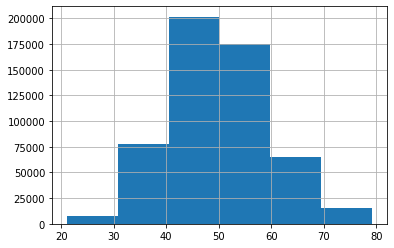

In [ ]:
nBins = 6
data['ESTU_INSE_INDIVIDUAL'].hist(bins=nBins)

bins = pd.cut(data['ESTU_INSE_INDIVIDUAL'],nBins,labels=[1,2,3,4,5,6])
print("Discretización ESTU_INSE_INDIVIDUAL en 6 BINS:\n")

data['ESTU_INSE_INDIVIDUAL'] = bins
bins.value_counts(sort=False)

PCA:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

colNames = ['PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 
                     'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
                     'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 
                     'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS',
                    'PUNT_INGLES', 'PERCENTIL_INGLES']

data3 = data.loc[:, colNames]

# Entrenamiento modelo PCA con escalado de los datos
# Si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. 
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data3)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']


# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data3.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
)

,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES
PC1,0.274951,0.274989,0.256888,0.272284,0.271880,0.251870,0.278521,0.277596,0.262185,0.276068,0.274889,0.262761,0.252534,0.251647
PC2,0.276640,0.279313,0.302139,-0.354840,-0.348900,-0.396484,-0.192279,-0.192562,-0.205733,0.270977,0.276223,0.288171,-0.007527,-0.010957
PC3,-0.125616,-0.122829,-0.146206,-0.183115,-0.182782,-0.226279,0.024322,0.020349,0.029589,-0.090607,-0.099905,-0.092651,0.631506,0.634160
PC4,0.296833,0.282148,0.355625,0.182439,0.177241,0.241707,-0.300007,-0.299756,-0.355587,-0.265674,-0.260314,-0.304801,0.144579,0.155689
PC5,-0.235804,-0.219238,-0.298231,0.197326,0.199019,0.256144,-0.316099,-0.318744,-0.387099,0.290445,0.295633,0.338419,0.112223,0.113981
PC6,0.169495,0.252983,-0.391135,0.309858,0.413930,-0.659974,0.041729,0.087090,-0.193871,-0.024085,-0.004112,-0.050070,-0.036482,-0.004739
PC7,0.300982,0.382856,-0.608635,-0.246949,-0.250995,0.398023,0.080120,0.138339,-0.165053,0.048745,0.107841,-0.203478,-0.035981,0.022068
PC8,0.158947,0.176446,-0.264340,0.041734,0.018593,-0.002166,-0.370639,-0.427437,0.704648,-0.079549,-0.118698,0.183355,0.027903,-0.014658
PC9,0.065468,0.074994,-0.075613,-0.044858,-0.055391,0.083606,0.145574,0.125261,-0.215511,-0.393325,-0.427167,0.742451,0.014956,-0.018487
PC10,0.257009,-0.190018,-0.065283,0.303172,-0.279609,-0.026328,0.382261,-0.327602,-0.062003,0.285911,-0.236948,-0.050410,0.399733,-0.406549




```
# Esto tiene formato de código
```

Heatmap influencia de las variables en cada componente:

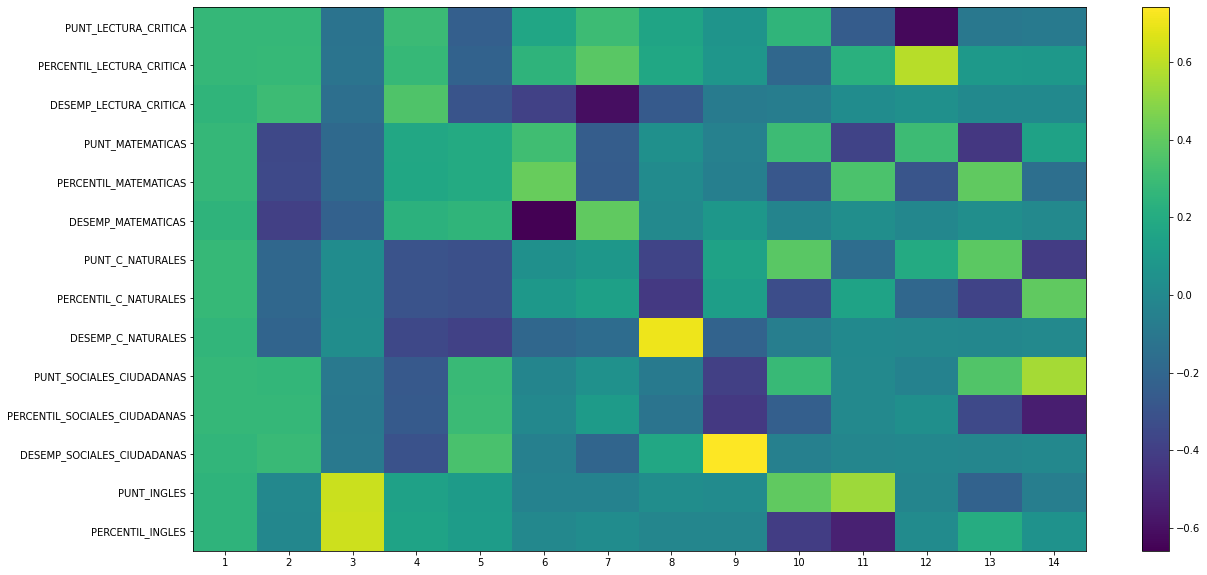

In [ ]:
#La influencia de las variables en cada componente analizarse visualmente con un gráfico 
#de tipo heatmap.

# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data3.columns)), data3.columns)
plt.xticks(range(len(data3.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()
plt.show()

Porcentaje de varianza explicada para cada componente:

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[7.60009805e-01 6.74720029e-02 5.22109470e-02 4.81893216e-02
 3.95274175e-02 7.65348747e-03 7.23846728e-03 7.03526566e-03
 6.05748372e-03 1.96503444e-03 8.92503693e-04 6.80111356e-04
 6.09225857e-04 4.58926557e-04]


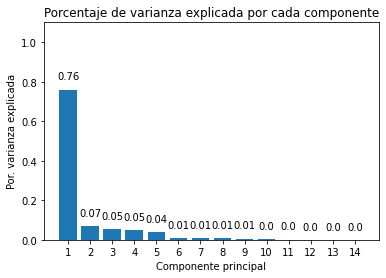

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data3.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Porcentaje de varianza explicada acumulada:

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.7600098  0.82748181 0.87969275 0.92788208 0.96740949 0.97506298
 0.98230145 0.98933671 0.9953942  0.99735923 0.99825174 0.99893185
 0.99954107 1.        ]


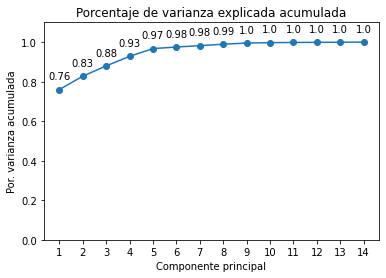

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data3.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data3.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Transformación:
Una vez entrenado el modelo, con el método $transform()$ se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [ ]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=data3)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'],
    index   = data3.index
)
proyecciones.head()
#De forma "manual"
#proyecciones = np.dot(modelo_pca.components_, scale(data3).T)
#proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
#proyecciones = proyecciones.transpose().set_index(data3.index)
#proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-2.546426,-0.524233,1.428746,1.566017,0.405413,0.475229,-0.023522,0.061936,0.277076,0.111803,-0.145118,-0.016751,0.070697,-0.001223
1,3.452128,0.159411,0.374295,0.310829,1.165501,0.524128,-0.042845,-0.270755,0.281248,-0.141235,0.007101,0.017419,-0.036779,0.037197
2,3.847171,2.689174,0.012624,0.836789,2.071942,-0.510735,-0.587110,0.661683,0.146620,-0.016593,0.032413,-0.007032,0.313639,0.327860
3,4.129970,1.263696,-0.513550,-1.826033,0.550768,-0.330755,0.345704,0.242005,0.500817,-0.037834,-0.070501,-0.013076,0.247249,0.339115
4,2.787078,0.679413,-0.550198,0.005472,0.417741,0.238139,0.499937,-0.271758,0.543095,-0.176920,0.023765,0.001149,0.006980,0.021231


Reducción de dimensionalidad aplicando PCA:
Se eligen los primeros 5 componentes principales que explican el 97% de la varianza observada.

In [ ]:
pc1_vals = modelo_pca.components_
print('Número de atributos antes de aplicar PCA= %d' % (data.shape[1]))

for p in range(5):
    aux = np.zeros(data3.shape[0])
    for i in range(data3.shape[0]):
        for j in range(data3.shape[1]):
            pc1_col = data3[colNames[j]][i]
            aux[i] += pc1_col * pc1_vals[p][j]
    data['PC'+str(p+1)] = aux

Número de atributos antes de aplicar PCA= 81


*Eliminación* de columnas:

In [ ]:
data = data.drop(colNames, axis=1)
print('Número de atributos después de aplicar PCA = %d' % (data.shape[1]))

Número de atributos después de aplicar PCA = 72


Nueva dimensión del dataset:

In [ ]:
print('Nuevo número de instancias = %d' % (data.shape[0]))
print('Nuevo número de atributos = %d' % (data.shape[1]))

Nuevo número de instancias = 541941
Nuevo número de atributos = 72


Muestreo (sampling):

1.   Elemento de la lista
2.   Elemento de la lista


Se toma el 60% del dataset que equivale al 60% de la población.



In [ ]:
sample = data.sample(frac=0.6, random_state=1)
sample

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,PC1,PC2,PC3,PC4,PC5
260713,TI,COLOMBIA,M,6/27/2003 0:00,20194,SB11201940092978,ESTUDIANTE,No,COLOMBIA,BOGOTÁ,11,BOGOTÁ D.C.,11001,Sin Estrato,5 a 6,Tres,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,No,No,Si,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,No leo por entretenimiento,No Navega Internet,Menos de 10 horas,"Si, en efectivo",63255,1.110000e+11,COLEGIO LLANO ORIENTAL (IED),MIXTO,OFICIAL,A,N,ACADÉMICO,1.110000e+11,CENT EDUC DIST LLANO ORIENTAL,S,URBANO,TARDE,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,A-,213,29,4,3.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD,99.185053,-9.202836,6.204560,18.017411,-7.663750
211640,TI,COLOMBIA,M,9/12/2002 0:00,20194,SB11201940065154,ESTUDIANTE,No,COLOMBIA,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 1,9 o más,Dos,Primaria incompleta,Secundaria (Bachillerato) incompleta,"Trabaja como personal de limpieza, mantenimien...","Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,Si,No,26 A 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Peor,30 minutos o menos,Entre 1 y 3 horas,Entre 11 y 20 horas,"Si, en efectivo",99051,1.110000e+11,COLEGIO CARLOS ALBAN HOLGUIN (IED),MIXTO,OFICIAL,A,N,ACADÉMICO,1.110000e+11,CENT EDUC DIST CARLOS ALBAN HOLGUIN,S,URBANO,TARDE,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,A1,312,89,3,2.0,2.0,PUBLICAR,NO,199.792621,-13.371924,24.116221,2.827682,9.664295
511064,CC,COLOMBIA,F,4/26/1999 0:00,20194,SB11201940214155,ESTUDIANTE,Si,COLOMBIA,CAUCA,19,JAMBALÓ,19364,Sin Estrato,1 a 2,Tres,Primaria completa,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Mejor,30 minutos o menos,No Navega Internet,Más de 30 horas,No,48611,1.190000e+11,I.E. BACHILLERATO TECNICO AGRICOLA DE JAMBALO,MIXTO,OFICIAL,A,S,TÉCNICO,1.190000e+11,I.E. BACHILLERATO TECNICO AGRICOLA DE JAMBALO,S,URBANO,COMPLETA,19364,JAMBALÓ,19,CAUCA,N,19743,SILVIA,CAUCA,19,A-,154,2,2,1.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD,56.742947,-7.598199,26.240946,-3.126853,-3.437143
306213,TI,COLOMBIA,F,8/31/2001 0:00,20194,SB11201940080061,ESTUDIANTE,No,COLOMBIA,CAUCA,19,POPAYÁN,19001,Estrato 3,1 a 2,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Tiene un trabajo de tipo auxiliar administrati...,Es vendedor o trabaja en atención al público,Si,Si,No,Si,Si,No,No,No,0 A 